In [1]:
"""
Paper   : https://arxiv.org/pdf/1808.00508v1.pdf
Authors : Andrew Trask, Felix Hill, Scott Reed, Jack Rae
"""

'\nPaper   : https://arxiv.org/pdf/1808.00508v1.pdf\nAuthors : Andrew Trask, Felix Hill, Scott Reed, Jack Rae\n'

## Neural Accumulator

![Neural Accumulator](https://cdn-images-1.medium.com/max/1600/1*vMYerlUvUP5gw4LDZv-aSg.png)

In [4]:
import torch
import torch.nn as nn
from torch.nn.parameter import Parameter
import numpy as np
import matplotlib.pyplot as plt

In [15]:
class NeuralAccumulator(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(NeuralAccumulator, self).__init__()
        self.W1 = Parameter(torch.Tensor(out_dim, in_dim))
        self.W2 = Parameter(torch.Tensor(out_dim, in_dim))
        self.register_parameter('bias', None)
        
        self.W = Parameter(torch.tanh(self.W1) * torch.sigmoid(self.W2))
        
        nn.init.xavier_uniform_(self.W1)
        nn.init.xavier_uniform_(self.W2)
        
    def forward(self, x):
        out = nn.functional.linear(x, self.W, self.bias)
        return out

### Neural Accumulator for Extrapolation

In [8]:
def dataset(train_size, test_size, fn):
    X = torch.Tensor(train_size + test_size, 2)
    Y = torch.Tensor(train_size + test_size, 1)

    for i in range(train_size + test_size):
        x = torch.rand(2)*10
        y = torch.tensor([fn(*x)])
        X[i] = x
        Y[i] = y
    
    X_train, y_train = X[:train_size], Y[:train_size]
    X_test, y_test = X[train_size:], Y[train_size:]
    return X_train, y_train, X_test, y_test

In [9]:
f = lambda x, y: x + y
X_train, y_train, X_test, y_test = dataset(1000, 200, f)

In [12]:
for i in range(10):
    print(f'X = {X_train[i]}\ty = {y_train[i]}')

X = tensor([ 5.6294,  3.7205])	y = tensor([ 9.3499])
X = tensor([ 3.3979,  0.0743])	y = tensor([ 3.4722])
X = tensor([ 2.2337,  0.3268])	y = tensor([ 2.5605])
X = tensor([ 4.2039,  9.6030])	y = tensor([ 13.8069])
X = tensor([ 1.9430,  1.5801])	y = tensor([ 3.5230])
X = tensor([ 7.1482,  3.1841])	y = tensor([ 10.3323])
X = tensor([ 7.6909,  8.4041])	y = tensor([ 16.0950])
X = tensor([ 5.4284,  2.1688])	y = tensor([ 7.5972])
X = tensor([ 3.5210,  7.8779])	y = tensor([ 11.3989])
X = tensor([ 5.3086,  8.7236])	y = tensor([ 14.0322])


In [43]:
nac = NeuralAccumulator(2,1)

In [44]:
nac(X_train[0])

tensor([ 2.8147])

In [45]:
optimizer = torch.optim.SGD(nac.parameters(), lr=1e-2)
crieterion = criterion = nn.MSELoss()

In [46]:
losses = []
for i in range(1000):
    out = nac(X_train)
    loss = crieterion(out, y_train)
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print("\t{}/{}: loss: {:.7f} ".format(i+1, num_iters, loss.item()))


	1/1000: loss: 66.5945282 
	2/1000: loss: 2.5424151 
	3/1000: loss: 0.5567204 
	4/1000: loss: 0.3531415 
	5/1000: loss: 0.2442876 
	6/1000: loss: 0.1696015 
	7/1000: loss: 0.1177661 
	8/1000: loss: 0.0817736 
	9/1000: loss: 0.0567815 
	10/1000: loss: 0.0394277 
	11/1000: loss: 0.0273775 
	12/1000: loss: 0.0190103 
	13/1000: loss: 0.0132002 
	14/1000: loss: 0.0091659 
	15/1000: loss: 0.0063645 
	16/1000: loss: 0.0044194 
	17/1000: loss: 0.0030687 
	18/1000: loss: 0.0021308 
	19/1000: loss: 0.0014796 
	20/1000: loss: 0.0010274 
	21/1000: loss: 0.0007134 
	22/1000: loss: 0.0004954 
	23/1000: loss: 0.0003440 
	24/1000: loss: 0.0002388 
	25/1000: loss: 0.0001658 
	26/1000: loss: 0.0001152 
	27/1000: loss: 0.0000800 
	28/1000: loss: 0.0000555 
	29/1000: loss: 0.0000386 
	30/1000: loss: 0.0000268 
	31/1000: loss: 0.0000186 
	32/1000: loss: 0.0000129 
	33/1000: loss: 0.0000090 
	34/1000: loss: 0.0000062 
	35/1000: loss: 0.0000043 
	36/1000: loss: 0.0000030 
	37/1000: loss: 0.0000021 
	38/1000:

	596/1000: loss: 0.0000000 
	597/1000: loss: 0.0000000 
	598/1000: loss: 0.0000000 
	599/1000: loss: 0.0000000 
	600/1000: loss: 0.0000000 
	601/1000: loss: 0.0000000 
	602/1000: loss: 0.0000000 
	603/1000: loss: 0.0000000 
	604/1000: loss: 0.0000000 
	605/1000: loss: 0.0000000 
	606/1000: loss: 0.0000000 
	607/1000: loss: 0.0000000 
	608/1000: loss: 0.0000000 
	609/1000: loss: 0.0000000 
	610/1000: loss: 0.0000000 
	611/1000: loss: 0.0000000 
	612/1000: loss: 0.0000000 
	613/1000: loss: 0.0000000 
	614/1000: loss: 0.0000000 
	615/1000: loss: 0.0000000 
	616/1000: loss: 0.0000000 
	617/1000: loss: 0.0000000 
	618/1000: loss: 0.0000000 
	619/1000: loss: 0.0000000 
	620/1000: loss: 0.0000000 
	621/1000: loss: 0.0000000 
	622/1000: loss: 0.0000000 
	623/1000: loss: 0.0000000 
	624/1000: loss: 0.0000000 
	625/1000: loss: 0.0000000 
	626/1000: loss: 0.0000000 
	627/1000: loss: 0.0000000 
	628/1000: loss: 0.0000000 
	629/1000: loss: 0.0000000 
	630/1000: loss: 0.0000000 
	631/1000: loss: 0.0

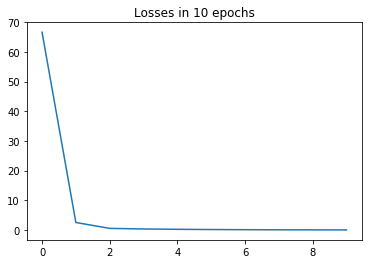

In [54]:
plt.plot(losses[:10])
plt.title('Losses in 10 epochs')
plt.show()

In [59]:
with torch.no_grad():
    train_out = nac(X_train)
    train_loss = crieterion(train_out, y_train)
    print(f'train loss = {train_loss}')

train loss = 9.989236000873536e-13


In [60]:
with torch.no_grad():
    test_out = nac(X_test)
    test_loss = crieterion(test_out, y_test)
    print(f'test loss = {test_loss}')

test loss = 9.74864611778814e-13


### Neural Accumulator vs MLP

In [64]:
class MLP(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(MLP, self).__init__()
        self.fc = nn.Linear(in_dim, out_dim)
    def forward(self, x):
        return self.fc(x)

In [65]:
mlp = MLP(2, 1)

In [66]:
mlp(X_train[0])

tensor([-1.4536])

In [70]:
mlp_losses = []
for i in range(10000):
    out = mlp(X_train)
    loss = crieterion(out, y_train)
    mlp_losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print("\t{}/{}: mlp loss: {:.7f} ".format(i+1, num_iters, loss.item()))


	1/1000: mlp loss: 172.5703430 
	2/1000: mlp loss: 172.5703430 
	3/1000: mlp loss: 172.5703430 
	4/1000: mlp loss: 172.5703430 
	5/1000: mlp loss: 172.5703430 
	6/1000: mlp loss: 172.5703430 
	7/1000: mlp loss: 172.5703430 
	8/1000: mlp loss: 172.5703430 
	9/1000: mlp loss: 172.5703430 
	10/1000: mlp loss: 172.5703430 
	11/1000: mlp loss: 172.5703430 
	12/1000: mlp loss: 172.5703430 
	13/1000: mlp loss: 172.5703430 
	14/1000: mlp loss: 172.5703430 
	15/1000: mlp loss: 172.5703430 
	16/1000: mlp loss: 172.5703430 
	17/1000: mlp loss: 172.5703430 
	18/1000: mlp loss: 172.5703430 
	19/1000: mlp loss: 172.5703430 
	20/1000: mlp loss: 172.5703430 
	21/1000: mlp loss: 172.5703430 
	22/1000: mlp loss: 172.5703430 
	23/1000: mlp loss: 172.5703430 
	24/1000: mlp loss: 172.5703430 
	25/1000: mlp loss: 172.5703430 
	26/1000: mlp loss: 172.5703430 
	27/1000: mlp loss: 172.5703430 
	28/1000: mlp loss: 172.5703430 
	29/1000: mlp loss: 172.5703430 
	30/1000: mlp loss: 172.5703430 
	31/1000: mlp loss:

	679/1000: mlp loss: 172.5703430 
	680/1000: mlp loss: 172.5703430 
	681/1000: mlp loss: 172.5703430 
	682/1000: mlp loss: 172.5703430 
	683/1000: mlp loss: 172.5703430 
	684/1000: mlp loss: 172.5703430 
	685/1000: mlp loss: 172.5703430 
	686/1000: mlp loss: 172.5703430 
	687/1000: mlp loss: 172.5703430 
	688/1000: mlp loss: 172.5703430 
	689/1000: mlp loss: 172.5703430 
	690/1000: mlp loss: 172.5703430 
	691/1000: mlp loss: 172.5703430 
	692/1000: mlp loss: 172.5703430 
	693/1000: mlp loss: 172.5703430 
	694/1000: mlp loss: 172.5703430 
	695/1000: mlp loss: 172.5703430 
	696/1000: mlp loss: 172.5703430 
	697/1000: mlp loss: 172.5703430 
	698/1000: mlp loss: 172.5703430 
	699/1000: mlp loss: 172.5703430 
	700/1000: mlp loss: 172.5703430 
	701/1000: mlp loss: 172.5703430 
	702/1000: mlp loss: 172.5703430 
	703/1000: mlp loss: 172.5703430 
	704/1000: mlp loss: 172.5703430 
	705/1000: mlp loss: 172.5703430 
	706/1000: mlp loss: 172.5703430 
	707/1000: mlp loss: 172.5703430 
	708/1000: mlp

	1275/1000: mlp loss: 172.5703430 
	1276/1000: mlp loss: 172.5703430 
	1277/1000: mlp loss: 172.5703430 
	1278/1000: mlp loss: 172.5703430 
	1279/1000: mlp loss: 172.5703430 
	1280/1000: mlp loss: 172.5703430 
	1281/1000: mlp loss: 172.5703430 
	1282/1000: mlp loss: 172.5703430 
	1283/1000: mlp loss: 172.5703430 
	1284/1000: mlp loss: 172.5703430 
	1285/1000: mlp loss: 172.5703430 
	1286/1000: mlp loss: 172.5703430 
	1287/1000: mlp loss: 172.5703430 
	1288/1000: mlp loss: 172.5703430 
	1289/1000: mlp loss: 172.5703430 
	1290/1000: mlp loss: 172.5703430 
	1291/1000: mlp loss: 172.5703430 
	1292/1000: mlp loss: 172.5703430 
	1293/1000: mlp loss: 172.5703430 
	1294/1000: mlp loss: 172.5703430 
	1295/1000: mlp loss: 172.5703430 
	1296/1000: mlp loss: 172.5703430 
	1297/1000: mlp loss: 172.5703430 
	1298/1000: mlp loss: 172.5703430 
	1299/1000: mlp loss: 172.5703430 
	1300/1000: mlp loss: 172.5703430 
	1301/1000: mlp loss: 172.5703430 
	1302/1000: mlp loss: 172.5703430 
	1303/1000: mlp loss

	1828/1000: mlp loss: 172.5703430 
	1829/1000: mlp loss: 172.5703430 
	1830/1000: mlp loss: 172.5703430 
	1831/1000: mlp loss: 172.5703430 
	1832/1000: mlp loss: 172.5703430 
	1833/1000: mlp loss: 172.5703430 
	1834/1000: mlp loss: 172.5703430 
	1835/1000: mlp loss: 172.5703430 
	1836/1000: mlp loss: 172.5703430 
	1837/1000: mlp loss: 172.5703430 
	1838/1000: mlp loss: 172.5703430 
	1839/1000: mlp loss: 172.5703430 
	1840/1000: mlp loss: 172.5703430 
	1841/1000: mlp loss: 172.5703430 
	1842/1000: mlp loss: 172.5703430 
	1843/1000: mlp loss: 172.5703430 
	1844/1000: mlp loss: 172.5703430 
	1845/1000: mlp loss: 172.5703430 
	1846/1000: mlp loss: 172.5703430 
	1847/1000: mlp loss: 172.5703430 
	1848/1000: mlp loss: 172.5703430 
	1849/1000: mlp loss: 172.5703430 
	1850/1000: mlp loss: 172.5703430 
	1851/1000: mlp loss: 172.5703430 
	1852/1000: mlp loss: 172.5703430 
	1853/1000: mlp loss: 172.5703430 
	1854/1000: mlp loss: 172.5703430 
	1855/1000: mlp loss: 172.5703430 
	1856/1000: mlp loss

	2424/1000: mlp loss: 172.5703430 
	2425/1000: mlp loss: 172.5703430 
	2426/1000: mlp loss: 172.5703430 
	2427/1000: mlp loss: 172.5703430 
	2428/1000: mlp loss: 172.5703430 
	2429/1000: mlp loss: 172.5703430 
	2430/1000: mlp loss: 172.5703430 
	2431/1000: mlp loss: 172.5703430 
	2432/1000: mlp loss: 172.5703430 
	2433/1000: mlp loss: 172.5703430 
	2434/1000: mlp loss: 172.5703430 
	2435/1000: mlp loss: 172.5703430 
	2436/1000: mlp loss: 172.5703430 
	2437/1000: mlp loss: 172.5703430 
	2438/1000: mlp loss: 172.5703430 
	2439/1000: mlp loss: 172.5703430 
	2440/1000: mlp loss: 172.5703430 
	2441/1000: mlp loss: 172.5703430 
	2442/1000: mlp loss: 172.5703430 
	2443/1000: mlp loss: 172.5703430 
	2444/1000: mlp loss: 172.5703430 
	2445/1000: mlp loss: 172.5703430 
	2446/1000: mlp loss: 172.5703430 
	2447/1000: mlp loss: 172.5703430 
	2448/1000: mlp loss: 172.5703430 
	2449/1000: mlp loss: 172.5703430 
	2450/1000: mlp loss: 172.5703430 
	2451/1000: mlp loss: 172.5703430 
	2452/1000: mlp loss

	3011/1000: mlp loss: 172.5703430 
	3012/1000: mlp loss: 172.5703430 
	3013/1000: mlp loss: 172.5703430 
	3014/1000: mlp loss: 172.5703430 
	3015/1000: mlp loss: 172.5703430 
	3016/1000: mlp loss: 172.5703430 
	3017/1000: mlp loss: 172.5703430 
	3018/1000: mlp loss: 172.5703430 
	3019/1000: mlp loss: 172.5703430 
	3020/1000: mlp loss: 172.5703430 
	3021/1000: mlp loss: 172.5703430 
	3022/1000: mlp loss: 172.5703430 
	3023/1000: mlp loss: 172.5703430 
	3024/1000: mlp loss: 172.5703430 
	3025/1000: mlp loss: 172.5703430 
	3026/1000: mlp loss: 172.5703430 
	3027/1000: mlp loss: 172.5703430 
	3028/1000: mlp loss: 172.5703430 
	3029/1000: mlp loss: 172.5703430 
	3030/1000: mlp loss: 172.5703430 
	3031/1000: mlp loss: 172.5703430 
	3032/1000: mlp loss: 172.5703430 
	3033/1000: mlp loss: 172.5703430 
	3034/1000: mlp loss: 172.5703430 
	3035/1000: mlp loss: 172.5703430 
	3036/1000: mlp loss: 172.5703430 
	3037/1000: mlp loss: 172.5703430 
	3038/1000: mlp loss: 172.5703430 
	3039/1000: mlp loss

	3643/1000: mlp loss: 172.5703430 
	3644/1000: mlp loss: 172.5703430 
	3645/1000: mlp loss: 172.5703430 
	3646/1000: mlp loss: 172.5703430 
	3647/1000: mlp loss: 172.5703430 
	3648/1000: mlp loss: 172.5703430 
	3649/1000: mlp loss: 172.5703430 
	3650/1000: mlp loss: 172.5703430 
	3651/1000: mlp loss: 172.5703430 
	3652/1000: mlp loss: 172.5703430 
	3653/1000: mlp loss: 172.5703430 
	3654/1000: mlp loss: 172.5703430 
	3655/1000: mlp loss: 172.5703430 
	3656/1000: mlp loss: 172.5703430 
	3657/1000: mlp loss: 172.5703430 
	3658/1000: mlp loss: 172.5703430 
	3659/1000: mlp loss: 172.5703430 
	3660/1000: mlp loss: 172.5703430 
	3661/1000: mlp loss: 172.5703430 
	3662/1000: mlp loss: 172.5703430 
	3663/1000: mlp loss: 172.5703430 
	3664/1000: mlp loss: 172.5703430 
	3665/1000: mlp loss: 172.5703430 
	3666/1000: mlp loss: 172.5703430 
	3667/1000: mlp loss: 172.5703430 
	3668/1000: mlp loss: 172.5703430 
	3669/1000: mlp loss: 172.5703430 
	3670/1000: mlp loss: 172.5703430 
	3671/1000: mlp loss

	4279/1000: mlp loss: 172.5703430 
	4280/1000: mlp loss: 172.5703430 
	4281/1000: mlp loss: 172.5703430 
	4282/1000: mlp loss: 172.5703430 
	4283/1000: mlp loss: 172.5703430 
	4284/1000: mlp loss: 172.5703430 
	4285/1000: mlp loss: 172.5703430 
	4286/1000: mlp loss: 172.5703430 
	4287/1000: mlp loss: 172.5703430 
	4288/1000: mlp loss: 172.5703430 
	4289/1000: mlp loss: 172.5703430 
	4290/1000: mlp loss: 172.5703430 
	4291/1000: mlp loss: 172.5703430 
	4292/1000: mlp loss: 172.5703430 
	4293/1000: mlp loss: 172.5703430 
	4294/1000: mlp loss: 172.5703430 
	4295/1000: mlp loss: 172.5703430 
	4296/1000: mlp loss: 172.5703430 
	4297/1000: mlp loss: 172.5703430 
	4298/1000: mlp loss: 172.5703430 
	4299/1000: mlp loss: 172.5703430 
	4300/1000: mlp loss: 172.5703430 
	4301/1000: mlp loss: 172.5703430 
	4302/1000: mlp loss: 172.5703430 
	4303/1000: mlp loss: 172.5703430 
	4304/1000: mlp loss: 172.5703430 
	4305/1000: mlp loss: 172.5703430 
	4306/1000: mlp loss: 172.5703430 
	4307/1000: mlp loss

	4883/1000: mlp loss: 172.5703430 
	4884/1000: mlp loss: 172.5703430 
	4885/1000: mlp loss: 172.5703430 
	4886/1000: mlp loss: 172.5703430 
	4887/1000: mlp loss: 172.5703430 
	4888/1000: mlp loss: 172.5703430 
	4889/1000: mlp loss: 172.5703430 
	4890/1000: mlp loss: 172.5703430 
	4891/1000: mlp loss: 172.5703430 
	4892/1000: mlp loss: 172.5703430 
	4893/1000: mlp loss: 172.5703430 
	4894/1000: mlp loss: 172.5703430 
	4895/1000: mlp loss: 172.5703430 
	4896/1000: mlp loss: 172.5703430 
	4897/1000: mlp loss: 172.5703430 
	4898/1000: mlp loss: 172.5703430 
	4899/1000: mlp loss: 172.5703430 
	4900/1000: mlp loss: 172.5703430 
	4901/1000: mlp loss: 172.5703430 
	4902/1000: mlp loss: 172.5703430 
	4903/1000: mlp loss: 172.5703430 
	4904/1000: mlp loss: 172.5703430 
	4905/1000: mlp loss: 172.5703430 
	4906/1000: mlp loss: 172.5703430 
	4907/1000: mlp loss: 172.5703430 
	4908/1000: mlp loss: 172.5703430 
	4909/1000: mlp loss: 172.5703430 
	4910/1000: mlp loss: 172.5703430 
	4911/1000: mlp loss

	5528/1000: mlp loss: 172.5703430 
	5529/1000: mlp loss: 172.5703430 
	5530/1000: mlp loss: 172.5703430 
	5531/1000: mlp loss: 172.5703430 
	5532/1000: mlp loss: 172.5703430 
	5533/1000: mlp loss: 172.5703430 
	5534/1000: mlp loss: 172.5703430 
	5535/1000: mlp loss: 172.5703430 
	5536/1000: mlp loss: 172.5703430 
	5537/1000: mlp loss: 172.5703430 
	5538/1000: mlp loss: 172.5703430 
	5539/1000: mlp loss: 172.5703430 
	5540/1000: mlp loss: 172.5703430 
	5541/1000: mlp loss: 172.5703430 
	5542/1000: mlp loss: 172.5703430 
	5543/1000: mlp loss: 172.5703430 
	5544/1000: mlp loss: 172.5703430 
	5545/1000: mlp loss: 172.5703430 
	5546/1000: mlp loss: 172.5703430 
	5547/1000: mlp loss: 172.5703430 
	5548/1000: mlp loss: 172.5703430 
	5549/1000: mlp loss: 172.5703430 
	5550/1000: mlp loss: 172.5703430 
	5551/1000: mlp loss: 172.5703430 
	5552/1000: mlp loss: 172.5703430 
	5553/1000: mlp loss: 172.5703430 
	5554/1000: mlp loss: 172.5703430 
	5555/1000: mlp loss: 172.5703430 
	5556/1000: mlp loss

	6167/1000: mlp loss: 172.5703430 
	6168/1000: mlp loss: 172.5703430 
	6169/1000: mlp loss: 172.5703430 
	6170/1000: mlp loss: 172.5703430 
	6171/1000: mlp loss: 172.5703430 
	6172/1000: mlp loss: 172.5703430 
	6173/1000: mlp loss: 172.5703430 
	6174/1000: mlp loss: 172.5703430 
	6175/1000: mlp loss: 172.5703430 
	6176/1000: mlp loss: 172.5703430 
	6177/1000: mlp loss: 172.5703430 
	6178/1000: mlp loss: 172.5703430 
	6179/1000: mlp loss: 172.5703430 
	6180/1000: mlp loss: 172.5703430 
	6181/1000: mlp loss: 172.5703430 
	6182/1000: mlp loss: 172.5703430 
	6183/1000: mlp loss: 172.5703430 
	6184/1000: mlp loss: 172.5703430 
	6185/1000: mlp loss: 172.5703430 
	6186/1000: mlp loss: 172.5703430 
	6187/1000: mlp loss: 172.5703430 
	6188/1000: mlp loss: 172.5703430 
	6189/1000: mlp loss: 172.5703430 
	6190/1000: mlp loss: 172.5703430 
	6191/1000: mlp loss: 172.5703430 
	6192/1000: mlp loss: 172.5703430 
	6193/1000: mlp loss: 172.5703430 
	6194/1000: mlp loss: 172.5703430 
	6195/1000: mlp loss

	6778/1000: mlp loss: 172.5703430 
	6779/1000: mlp loss: 172.5703430 
	6780/1000: mlp loss: 172.5703430 
	6781/1000: mlp loss: 172.5703430 
	6782/1000: mlp loss: 172.5703430 
	6783/1000: mlp loss: 172.5703430 
	6784/1000: mlp loss: 172.5703430 
	6785/1000: mlp loss: 172.5703430 
	6786/1000: mlp loss: 172.5703430 
	6787/1000: mlp loss: 172.5703430 
	6788/1000: mlp loss: 172.5703430 
	6789/1000: mlp loss: 172.5703430 
	6790/1000: mlp loss: 172.5703430 
	6791/1000: mlp loss: 172.5703430 
	6792/1000: mlp loss: 172.5703430 
	6793/1000: mlp loss: 172.5703430 
	6794/1000: mlp loss: 172.5703430 
	6795/1000: mlp loss: 172.5703430 
	6796/1000: mlp loss: 172.5703430 
	6797/1000: mlp loss: 172.5703430 
	6798/1000: mlp loss: 172.5703430 
	6799/1000: mlp loss: 172.5703430 
	6800/1000: mlp loss: 172.5703430 
	6801/1000: mlp loss: 172.5703430 
	6802/1000: mlp loss: 172.5703430 
	6803/1000: mlp loss: 172.5703430 
	6804/1000: mlp loss: 172.5703430 
	6805/1000: mlp loss: 172.5703430 
	6806/1000: mlp loss

	7388/1000: mlp loss: 172.5703430 
	7389/1000: mlp loss: 172.5703430 
	7390/1000: mlp loss: 172.5703430 
	7391/1000: mlp loss: 172.5703430 
	7392/1000: mlp loss: 172.5703430 
	7393/1000: mlp loss: 172.5703430 
	7394/1000: mlp loss: 172.5703430 
	7395/1000: mlp loss: 172.5703430 
	7396/1000: mlp loss: 172.5703430 
	7397/1000: mlp loss: 172.5703430 
	7398/1000: mlp loss: 172.5703430 
	7399/1000: mlp loss: 172.5703430 
	7400/1000: mlp loss: 172.5703430 
	7401/1000: mlp loss: 172.5703430 
	7402/1000: mlp loss: 172.5703430 
	7403/1000: mlp loss: 172.5703430 
	7404/1000: mlp loss: 172.5703430 
	7405/1000: mlp loss: 172.5703430 
	7406/1000: mlp loss: 172.5703430 
	7407/1000: mlp loss: 172.5703430 
	7408/1000: mlp loss: 172.5703430 
	7409/1000: mlp loss: 172.5703430 
	7410/1000: mlp loss: 172.5703430 
	7411/1000: mlp loss: 172.5703430 
	7412/1000: mlp loss: 172.5703430 
	7413/1000: mlp loss: 172.5703430 
	7414/1000: mlp loss: 172.5703430 
	7415/1000: mlp loss: 172.5703430 
	7416/1000: mlp loss

	7919/1000: mlp loss: 172.5703430 
	7920/1000: mlp loss: 172.5703430 
	7921/1000: mlp loss: 172.5703430 
	7922/1000: mlp loss: 172.5703430 
	7923/1000: mlp loss: 172.5703430 
	7924/1000: mlp loss: 172.5703430 
	7925/1000: mlp loss: 172.5703430 
	7926/1000: mlp loss: 172.5703430 
	7927/1000: mlp loss: 172.5703430 
	7928/1000: mlp loss: 172.5703430 
	7929/1000: mlp loss: 172.5703430 
	7930/1000: mlp loss: 172.5703430 
	7931/1000: mlp loss: 172.5703430 
	7932/1000: mlp loss: 172.5703430 
	7933/1000: mlp loss: 172.5703430 
	7934/1000: mlp loss: 172.5703430 
	7935/1000: mlp loss: 172.5703430 
	7936/1000: mlp loss: 172.5703430 
	7937/1000: mlp loss: 172.5703430 
	7938/1000: mlp loss: 172.5703430 
	7939/1000: mlp loss: 172.5703430 
	7940/1000: mlp loss: 172.5703430 
	7941/1000: mlp loss: 172.5703430 
	7942/1000: mlp loss: 172.5703430 
	7943/1000: mlp loss: 172.5703430 
	7944/1000: mlp loss: 172.5703430 
	7945/1000: mlp loss: 172.5703430 
	7946/1000: mlp loss: 172.5703430 
	7947/1000: mlp loss

	8432/1000: mlp loss: 172.5703430 
	8433/1000: mlp loss: 172.5703430 
	8434/1000: mlp loss: 172.5703430 
	8435/1000: mlp loss: 172.5703430 
	8436/1000: mlp loss: 172.5703430 
	8437/1000: mlp loss: 172.5703430 
	8438/1000: mlp loss: 172.5703430 
	8439/1000: mlp loss: 172.5703430 
	8440/1000: mlp loss: 172.5703430 
	8441/1000: mlp loss: 172.5703430 
	8442/1000: mlp loss: 172.5703430 
	8443/1000: mlp loss: 172.5703430 
	8444/1000: mlp loss: 172.5703430 
	8445/1000: mlp loss: 172.5703430 
	8446/1000: mlp loss: 172.5703430 
	8447/1000: mlp loss: 172.5703430 
	8448/1000: mlp loss: 172.5703430 
	8449/1000: mlp loss: 172.5703430 
	8450/1000: mlp loss: 172.5703430 
	8451/1000: mlp loss: 172.5703430 
	8452/1000: mlp loss: 172.5703430 
	8453/1000: mlp loss: 172.5703430 
	8454/1000: mlp loss: 172.5703430 
	8455/1000: mlp loss: 172.5703430 
	8456/1000: mlp loss: 172.5703430 
	8457/1000: mlp loss: 172.5703430 
	8458/1000: mlp loss: 172.5703430 
	8459/1000: mlp loss: 172.5703430 
	8460/1000: mlp loss

	8938/1000: mlp loss: 172.5703430 
	8939/1000: mlp loss: 172.5703430 
	8940/1000: mlp loss: 172.5703430 
	8941/1000: mlp loss: 172.5703430 
	8942/1000: mlp loss: 172.5703430 
	8943/1000: mlp loss: 172.5703430 
	8944/1000: mlp loss: 172.5703430 
	8945/1000: mlp loss: 172.5703430 
	8946/1000: mlp loss: 172.5703430 
	8947/1000: mlp loss: 172.5703430 
	8948/1000: mlp loss: 172.5703430 
	8949/1000: mlp loss: 172.5703430 
	8950/1000: mlp loss: 172.5703430 
	8951/1000: mlp loss: 172.5703430 
	8952/1000: mlp loss: 172.5703430 
	8953/1000: mlp loss: 172.5703430 
	8954/1000: mlp loss: 172.5703430 
	8955/1000: mlp loss: 172.5703430 
	8956/1000: mlp loss: 172.5703430 
	8957/1000: mlp loss: 172.5703430 
	8958/1000: mlp loss: 172.5703430 
	8959/1000: mlp loss: 172.5703430 
	8960/1000: mlp loss: 172.5703430 
	8961/1000: mlp loss: 172.5703430 
	8962/1000: mlp loss: 172.5703430 
	8963/1000: mlp loss: 172.5703430 
	8964/1000: mlp loss: 172.5703430 
	8965/1000: mlp loss: 172.5703430 
	8966/1000: mlp loss

	9491/1000: mlp loss: 172.5703430 
	9492/1000: mlp loss: 172.5703430 
	9493/1000: mlp loss: 172.5703430 
	9494/1000: mlp loss: 172.5703430 
	9495/1000: mlp loss: 172.5703430 
	9496/1000: mlp loss: 172.5703430 
	9497/1000: mlp loss: 172.5703430 
	9498/1000: mlp loss: 172.5703430 
	9499/1000: mlp loss: 172.5703430 
	9500/1000: mlp loss: 172.5703430 
	9501/1000: mlp loss: 172.5703430 
	9502/1000: mlp loss: 172.5703430 
	9503/1000: mlp loss: 172.5703430 
	9504/1000: mlp loss: 172.5703430 
	9505/1000: mlp loss: 172.5703430 
	9506/1000: mlp loss: 172.5703430 
	9507/1000: mlp loss: 172.5703430 
	9508/1000: mlp loss: 172.5703430 
	9509/1000: mlp loss: 172.5703430 
	9510/1000: mlp loss: 172.5703430 
	9511/1000: mlp loss: 172.5703430 
	9512/1000: mlp loss: 172.5703430 
	9513/1000: mlp loss: 172.5703430 
	9514/1000: mlp loss: 172.5703430 
	9515/1000: mlp loss: 172.5703430 
	9516/1000: mlp loss: 172.5703430 
	9517/1000: mlp loss: 172.5703430 
	9518/1000: mlp loss: 172.5703430 
	9519/1000: mlp loss

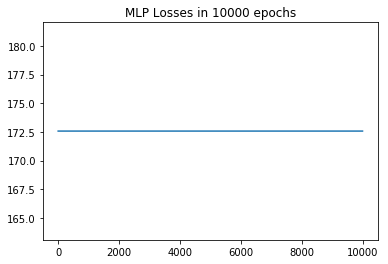

In [73]:
plt.plot(mlp_losses)
plt.title('MLP Losses in 10000 epochs')
plt.show()

##  Neural Arithmetic Logic Unit Cell 

In [ ]:
class NALU(nn.Module):
    